<a href="https://colab.research.google.com/github/BoYeonJang/ICT-AI-education/blob/main/(8%EC%9B%94%209%EC%9D%BC)%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%AA%A8%EB%8D%B8%20%EB%A7%8C%EB%93%A4%EA%B8%B0(1)/7_1_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타틱 데이터 분석 및 시각화

In [1]:
import numpy as np # 기본적인 수치계산
import pandas as pd
import seaborn as sns
# Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
# 타이타틱 데이터 내장

In [2]:
titanic = sns.load_dataset('titanic')

## 정보 탐색

In [3]:
titanic.head() # 데이터를 간단히 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Survival: 생존여부(0: 사망, 1: 생존)
- Pclass: 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Fare: 티켓의 요금
- Embarked: 배에 탑승한 위치(C: Cherbourg, Q: Queenstown, S: Southampton)

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe() # 수치 정보

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 숫자형(int, float) column들의 기술 통계량을 보여주는 함수
- 기술통계량이란?
  - 해당 column을 대표할 수 있는 통계값들을 의미
- 기술통계량 종류
  - count: 해당 column에서 비어 있지 않은 값의 개수
  - mean: 평균
  - std: 표준편차
  - min: 최소값(이상치 포함)
  - 25%: 전체 데이터를 순서대로 정렬했을 때, 아래에서부터 1/4번째 지점에 있는 값
  - 50%: 중앙값, 전체 데이터를 순서대로 정렬했을 때, 아래에서부터 2/4번째 지점에 있는 값
  - 75%: 전체 데이터를 순서대로 정렬했을 때, 아래에서부터 3/4번째 지점에 있는 값
  - max: 최대값(이상치 포함) 

In [6]:
titanic.dropna().describe() # 누락된 값 제외하고 수치 정보 표시

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [7]:
titanic.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

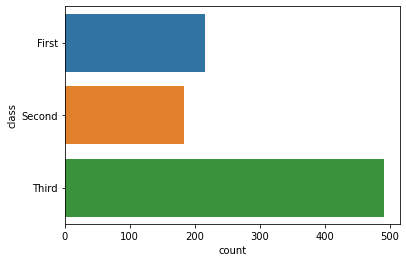

In [8]:
sns.countplot(y='class', data=titanic) # seaborn 시각화

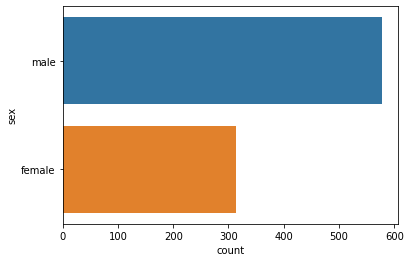

In [9]:
sns.countplot(y='sex', data=titanic)

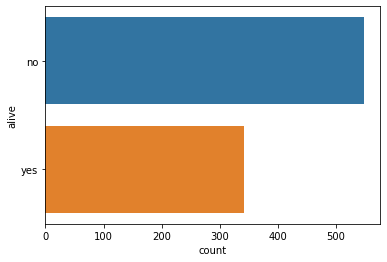

In [10]:
sns.countplot(y='alive', data=titanic)

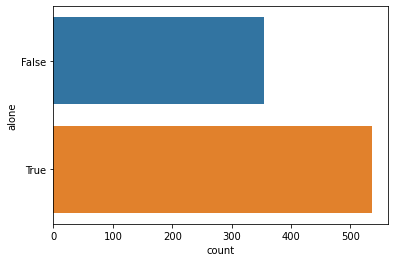

In [11]:
sns.countplot(y='alone', data=titanic)

In [14]:
titanic.query('alive == "yes"')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [15]:
titanic.query('alive == "yes"').groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [16]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [17]:
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [18]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [19]:
titanic.groupby(['class', 'sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


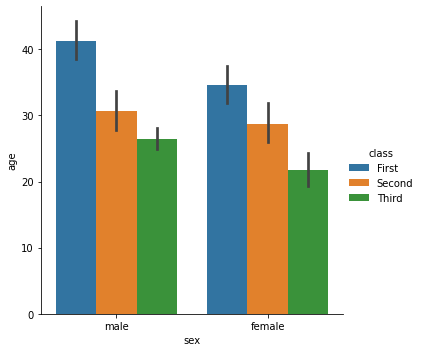

In [20]:
sns.catplot(x='sex', y='age', hue='class', kind='bar', data=titanic)
# hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화

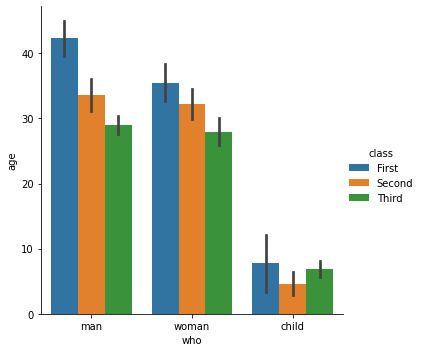

In [21]:
sns.catplot(x='who', y='age', hue='class', kind='bar', data=titanic)

# 캐글로 시작하는 새로운 도전

- 2010년 4월부터 지금까지 전 세계 데이터 과학자가 참가해 온 데이터 분석 경진대회
- 주어진 데이터를 사용해 정해진 시간 안에 가장 높은 정확도를 예측
- 분석 결과를 업로드하면 보통 몇 분 안에 채점
- 실제 데이터를 사용해 다양한 기술을 구현하므로 자신의 데이터 과학 수준을 확인
- 최신 기술과 트랜드를 배울 수 있는 기회

1. 캐글 가입 및 대회 선택
2. 데이터 획득
3. 학습하기
4. 결과 제출 및 업데이트
5. 최종 예측 결과

### [캐글 kaggle](https://www.kaggle.com/)



## [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

- 캐글에서 누구나 테스트 할 수 있게끔 준비한 데이터

## 데이터 획득

- data_description.txt: 내려받은 데이터의 각 속성이 무엇을 의미하는 지 설명
- train.csv: 집 값과 해당 집이 어떤 속성을 가졌는지 정리된 파일
- test.csv: 학습한 결과를 테스트하기 위한 데이터, train.csv 파일과 항목이 같지만 맨 마지막 집 값(SalePrice) 항목이 빠져있음. 이 항목을 예측하는 것이 과제
- sample_submission.csv: Id와 SalePrice 두 개의 열만 존재하는 파일, 각 Id별로 우리가 예측한 SalePrice를 채워 캐글에 업로드!

## 학습하기

In [23]:
from tensorflow.keras.models import load_model
import pandas as pd

In [24]:
kaggle_test = pd.read_csv('test.csv')

In [25]:
print(kaggle_test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [27]:
kaggle_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [29]:
# 결측치가 모두 몇 개인지 확인
kaggle_test.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [31]:
# 학습셋과 동일하게 전처리
# 테스트셋의 속성은 학습셋과 동일한 상태로 변형되어야 해당 모델을 적용 가능
# 카테고리형 변수를 0과 1로 이루어진 변수로 변경
kaggle_test = pd.get_dummies(kaggle_test)

In [32]:
# 결측치를 전체 컬럼의 평균으로 대체
kaggle_test = kaggle_test.fillna(kaggle_test.mean())

In [33]:
print(kaggle_test)
df = kaggle_test

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          1961          1961    

- Neighborhood: 지역
- MSZoning: 건물 형태 
- OverallQual: 건물 품질
- GarageType: 
- GarageCars: 
- GarageArea: 크기

## 주택 가격 예측하기

- 실제 데이터로 만들어보는 모델
- 아이오와주 에임스 지역에서 2006년부터 2010년까지 거래된 실제 부동산 판매 기록

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 데이터 준비

In [37]:
df = pd.read_csv('train.csv')
# 집 값 데이터

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
df = pd.get_dummies(df)
# 카테고리형 변수를 0과 1로 이루어진 변수로 교체

In [42]:
df = df.fillna(df.mean())
# 결측치를 전체 컬럼의 평균으로 대체
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [43]:
# 데이터 준비 후
df_corr = df.corr()

In [44]:
# 데이터 사이의 상관관계를 저장
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

In [45]:
# 집 값과 관련이 큰 것부터 순서대로 저장
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

In [46]:
# 집 값을 제외한 나머지 열 저장
X_train_pre = df[cols_train]

In [47]:
# 집 값을 저장
y = df['SalePrice'].values

In [48]:
# 전체 80%를 학습 셋으로 20%를 테스트셋으로 저장
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)

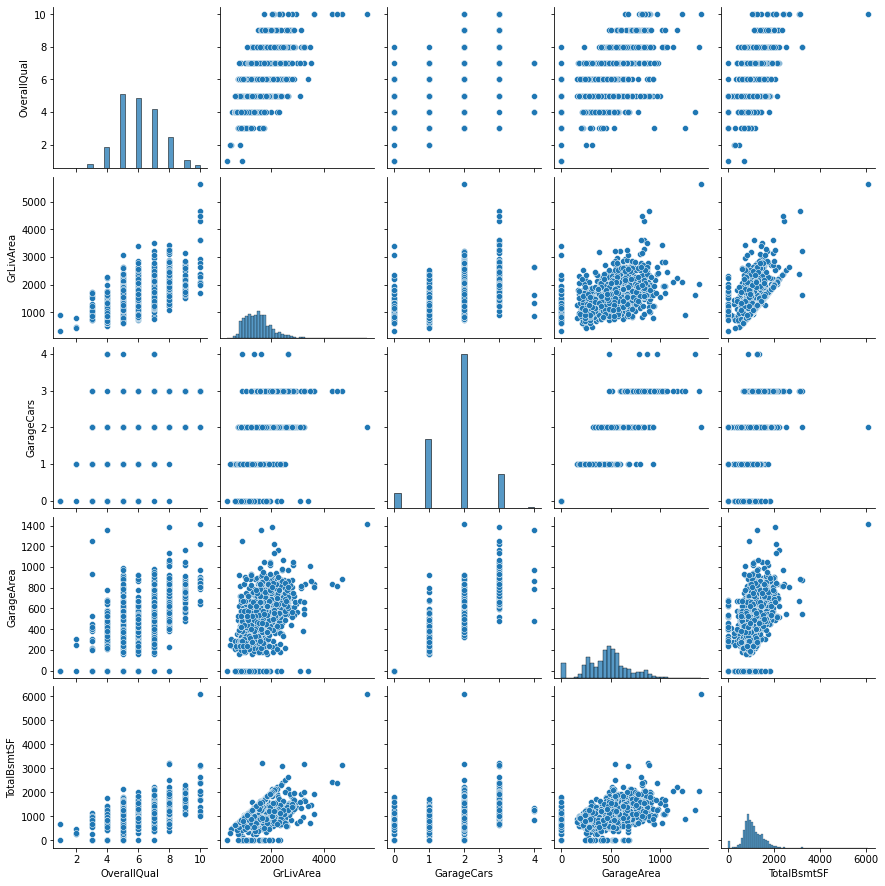

In [50]:
# 추출된 속성들과 집 값과 관련도를 시각적으로 확인
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

sns.pairplot(df[cols])
plt.show()

## 모델 구조

In [51]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 모델 실행하기
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
# 20번 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=20)

In [54]:
# 모델 저장
modelpath = 'house.hdf5'

In [57]:
# 최적화 모델 업데이트
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [58]:
# 실행 관련 설정 부분, 전체 20% 검증셋 설정
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size = 32, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 16ms/step - loss: 39992606720.0000 - val_loss: 38010662912.0000
Epoch 2/2000
28/28 [==============================] - 0s 6ms/step - loss: 39681130496.0000 - val_loss: 37635756032.0000
Epoch 3/2000
28/28 [==============================] - 0s 6ms/step - loss: 39118917632.0000 - val_loss: 36808118272.0000
Epoch 4/2000
28/28 [==============================] - 0s 6ms/step - loss: 37834969088.0000 - val_loss: 34963517440.0000
Epoch 5/2000
28/28 [==============================] - 0s 6ms/step - loss: 35068854272.0000 - val_loss: 31069558784.0000
Epoch 6/2000
28/28 [==============================] - 0s 7ms/step - loss: 29710710784.0000 - val_loss: 24161447936.0000
Epoch 7/2000
28/28 [==============================] - 0s 6ms/step - loss: 20876632064.0000 - val_loss: 14294969344.0000
Epoch 8/2000
28/28 [==============================] - 0s 9ms/step - loss: 10576573440.0000 - val_loss: 5125928448.0000
Epoch 9/2000
28/28 [====================

## 결과 시각화

In [59]:
# 예측 값, 실제 값, 실행 번호 시각화
# 25개 샘플로부터 얻은 결과로 채우기
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()

for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제 가격: {:.2f}, 에상 가격: {:.2f}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

실제 가격: 213500.00, 에상 가격: 201568.36
실제 가격: 108000.00, 에상 가격: 160584.61
실제 가격: 200500.00, 에상 가격: 190367.55
실제 가격: 91000.00, 에상 가격: 131278.73
실제 가격: 130000.00, 에상 가격: 170928.36
실제 가격: 196000.00, 에상 가격: 200546.33
실제 가격: 135960.00, 에상 가격: 152748.48
실제 가격: 178740.00, 에상 가격: 188051.61
실제 가격: 82500.00, 에상 가격: 62750.56
실제 가격: 181000.00, 에상 가격: 177411.19
실제 가격: 226700.00, 에상 가격: 204084.41
실제 가격: 190000.00, 에상 가격: 198526.14
실제 가격: 148800.00, 에상 가격: 133186.73
실제 가격: 194500.00, 에상 가격: 191627.66
실제 가격: 122000.00, 에상 가격: 147632.91
실제 가격: 132000.00, 에상 가격: 166057.95
실제 가격: 132500.00, 에상 가격: 157466.55
실제 가격: 269500.00, 에상 가격: 214791.25
실제 가격: 157000.00, 에상 가격: 161353.86
실제 가격: 190000.00, 에상 가격: 210098.95
실제 가격: 129000.00, 에상 가격: 153535.47
실제 가격: 193879.00, 에상 가격: 200657.28
실제 가격: 157000.00, 에상 가격: 167592.06
실제 가격: 225000.00, 에상 가격: 219879.17
실제 가격: 135000.00, 에상 가격: 154077.47


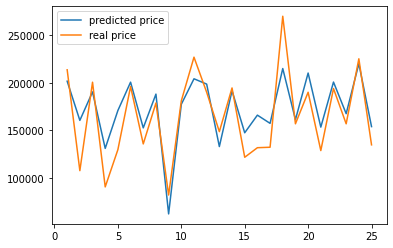

In [62]:
#  그래프를 통해 샘플을 비교
plt.plot(X_num, pred_prices, label = 'predicted price')
plt.plot(X_num, real_prices, label = 'real price')
plt.legend()
plt.show()

## 캐글로 시작하는 새로운 도전 이어서

In [63]:
# 집 값을 제외한 학습에 사용한 열을 저장
cols_kaggle = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
k_test = kaggle_test[cols_kaggle]

In [64]:
# 모델 불러오기
model = load_model('house.hdf5')

## model.predict()을 이용해서 k_test를 적용, 예측 값 만들기 실습

In [65]:
# model.predict()을 이용해서 k_test를 적용, 예측 값을 만듦
ids = []
# Id와 예측값이 들어갈 빈 리스트

Y_prediction = model.predict(k_test).flatten()

for i in range(len(k_test)):
  id = kaggle_test['Id'][i]
  prediction = Y_prediction[i]
  ids.append([id, prediction])

In [68]:
# 테스트 결과의 저장 환경 설정
# 앞서 만든 내용과 중복되지 않도록 현재 시간을 이용해 파일명 저장

import time

timestr = time.strftime('%Y%m%d-%H%M%S')
filename = str(timestr)
outdir = './'

In [69]:
# 앞서 만든 실행 번호(Id)와 예측값을 새로운 데이터 프레임에 넣고 csv 파일로 저장
df = pd.DataFrame(ids, columns = ['Id', 'SalePrice'])
df.to_csv(str(outdir + filename + '_submission.csv'), index = False)

## 실행 결과 제출하기

- 경진대회 웹 페이지로 돌아가서 'Submit Predictions' 클릭
- 하루에 몇 번 제출 가능한지, 제출 횟수는 언제 리셋되는지 공지되어 있음
- 예측 결과를 요약하고 업로드 할 수 있는 페이지에 제출 'Make Submission'
- 'Jumpt to your position on the leaderboard'에서 내가 제출한 예측 정확도와 순위가 표시
- 모델을 지속적으로 업데이트
- 'Code', 'Discussion' 메뉴를 선택하여 타 참가자들이 제출한 코드나 토론 내용을 공유